# Pré-processamento com TreeTagger

In [1]:
import nbimporter
import numpy as np
import re
import Convert_NRC as nrc
from header import EmotionAnalysis as ea

Importing Jupyter notebook from Convert_NRC.ipynb
Importing Jupyter notebook from /home/ellen/Projetos/TextMining/header/EmotionAnalysis.ipynb


## Obtenção do documento

In [2]:
filepath = 'books/senhora.txt'

In [3]:
raw = ea.open_file(filepath)

## Pré-processamento

In [4]:
tags = ea.tags(raw)

In [5]:
label = re.compile('^A|^R|^NC.P|^NCF|^V')

In [6]:
stopwords = ea.get_stopwords()

In [7]:
tokens = []
for tag in tags:
    if bool(re.search(label, tag[1])) == False or tag[2] == '<unknown>':
        tokens.append(tag[0].lower())
    else:
        tokens.append(tag[2])

In [8]:
negated_tokens = ea.negations(tokens)

In [9]:
no_stop_tokens = ea.remove_stopwords(stopwords, negated_tokens)

In [10]:
filtered_tokens = ea.remove_not_alpha(no_stop_tokens)

In [22]:
text = ea.convert_to_text(tokens)

### Análise do texto

In [11]:
dist = ea.tokens_frequency(filtered_tokens)

In [12]:
ea.info(tokens, filtered_tokens)

quantidade de palavras: 94484
quantidade de palavras após o filtro: 40987
quantidade de palavras únicas: 6811
quantidade de palavras únicas após o filtro: 6171
diversidade léxica: 15.055993363749481


In [13]:
freq = ea.most_frequent(filtered_tokens, dist, 20)
print(f"20 palavras mais frequentes: {freq}")

20 palavras mais frequentes: [('ser', 869), ('aurélia', 622), ('ter', 520), ('moço', 356), ('ir', 306), ('estar', 298), ('fazer', 283), ('haver', 263), ('seixas', 246), ('senhor', 243), ('marido', 220), ('seixa', 211), ('dizer', 209), ('mulher', 187), ('dar', 183), ('poder', 173), ('ainda', 168), ('vez', 152), ('casa', 149), ('ver', 146)]


### Análise de Emoção

In [14]:
wordList, emotionList = ea.emolex()

In [15]:
emoList = ea.newList(emotionList, filtered_tokens)

In [16]:
emotionCounts = ea.generate_count_with_negation(wordList, filtered_tokens)

In [17]:
emotionCounts.most_common()

[('positivo', 5886),
 ('negativo', 3536),
 ('confiança', 3363),
 ('antecipação', 2923),
 ('alegria', 2322),
 ('medo', 1954),
 ('tristeza', 1907),
 ('raiva', 1419),
 ('surpresa', 1202),
 ('nojo', 1095)]

In [18]:
wordCounts = ea.generate_count(emoList, filtered_tokens)

In [19]:
wordCounts.most_common(20)

[('amor', 2562),
 ('senhor', 1944),
 ('mãe', 1584),
 ('casar', 1554),
 ('sair', 1512),
 ('tratar', 1421),
 ('casamento', 1417),
 ('palavra', 1016),
 ('sorrir', 928),
 ('esperança', 928),
 ('doce', 864),
 ('perder', 756),
 ('flor', 715),
 ('liberdade', 704),
 ('dinheiro', 637),
 ('surpresa', 627),
 ('noivo', 611),
 ('paixão', 611),
 ('deus', 576),
 ('segredo', 552)]

In [20]:
wordArray = np.asarray(wordCounts.most_common(5))
wordArray = [i[0] for i in wordArray]

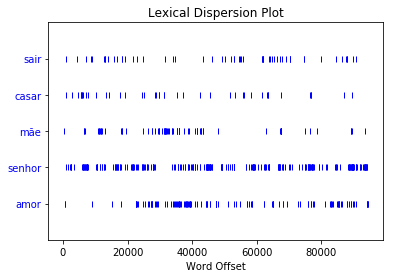

In [24]:
text.dispersion_plot(wordArray)

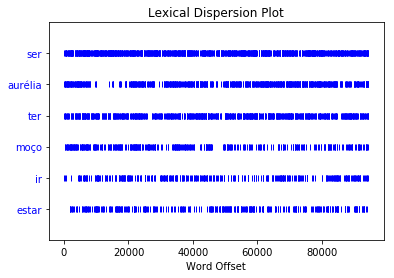

In [25]:
sortedToken = sorted(list(set(filtered_tokens)), key=lambda token: dist[token], reverse=True)
text.dispersion_plot(sortedToken[:6])